# **Loan Prediction Model:**

# Step 1: Data Exploration and Visualization
## 1. Load the Data:

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [2]:
# Load the JSON data
data_path ='/kaggle/input/loan-dataset/loan_approval_dataset.json'
with open(data_path) as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Display the first few rows
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
# Get the basic statistics
df.describe().style.background_gradient(cmap="Blues")

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4997116.665325,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2878311.013611,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,10310.000000,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2503015.000000,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5000694.500000,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7477502.000000,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9999938.000000,79.000000,20.000000,14.000000,14.000000,1.000000


In [4]:
# Check for missing values
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

## 2.Inspect Data Types:

In [5]:
# Define the columns
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
numerical_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Inspect the data types of the columns
print(df[categorical_cols].dtypes)

Married/Single     object
House_Ownership    object
Car_Ownership      object
Profession         object
CITY               object
STATE              object
dtype: object


## 3. Count of Categorical Features:

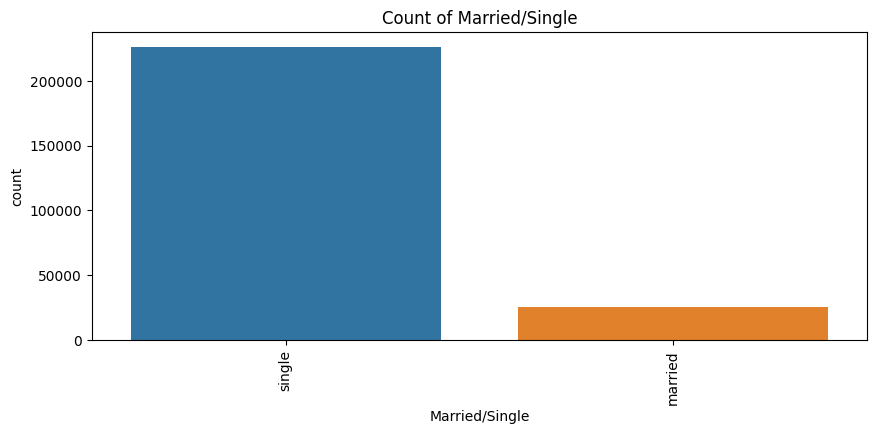

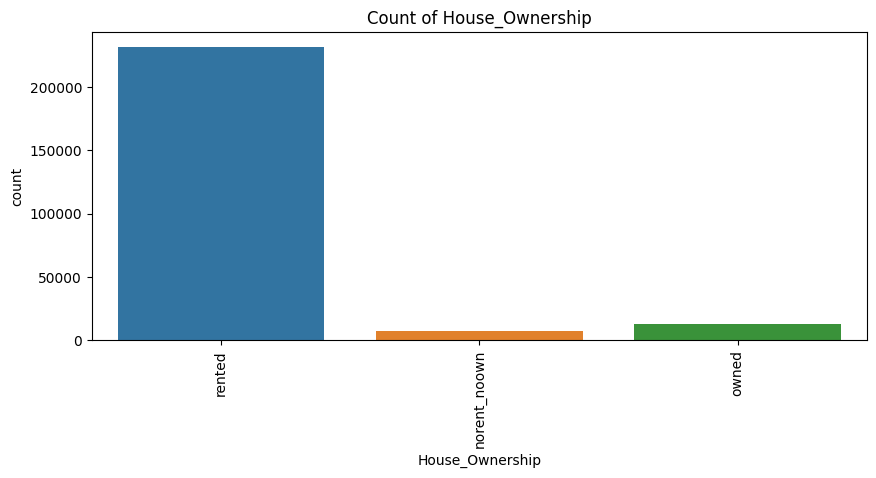

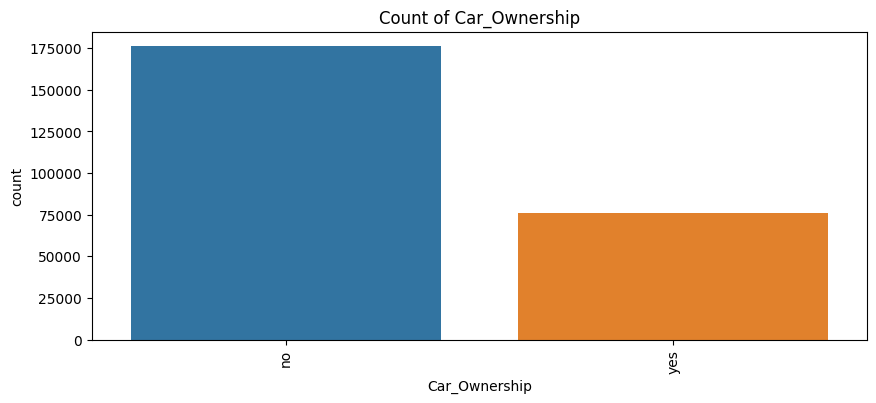

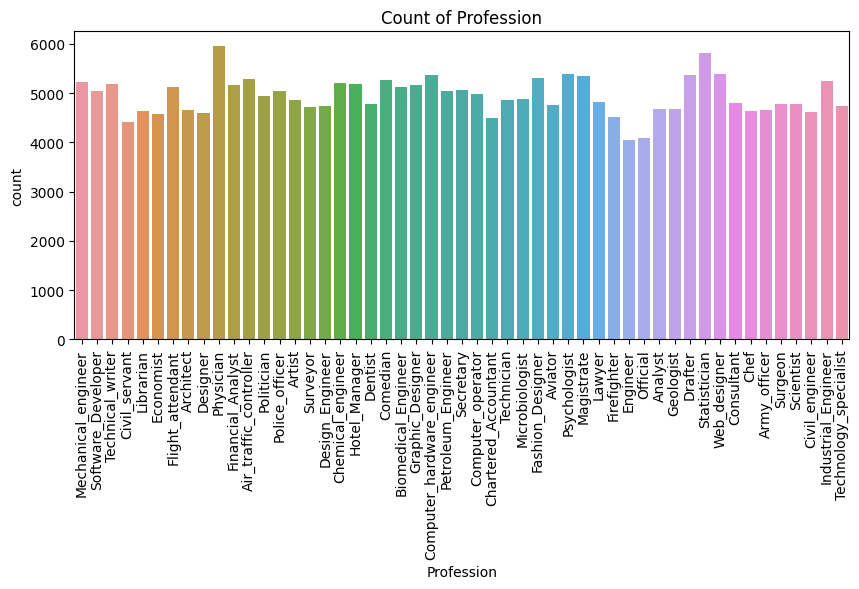

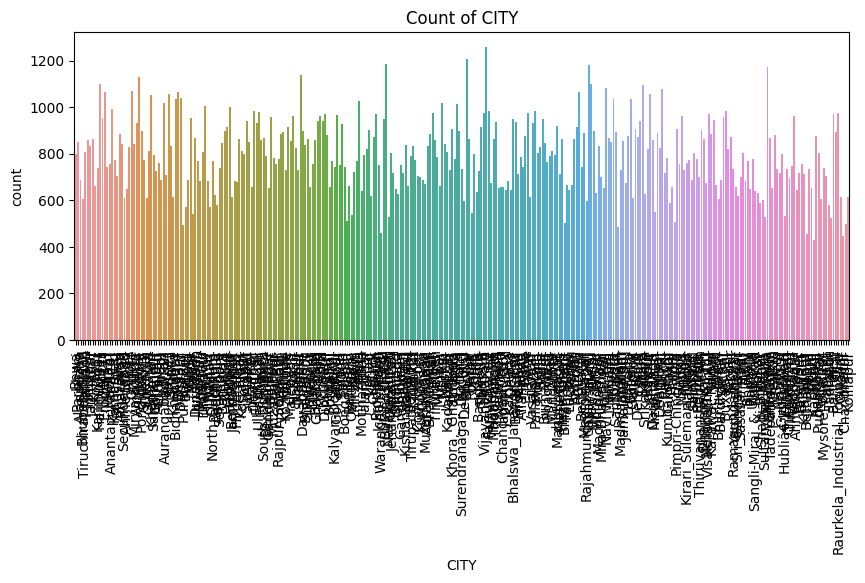

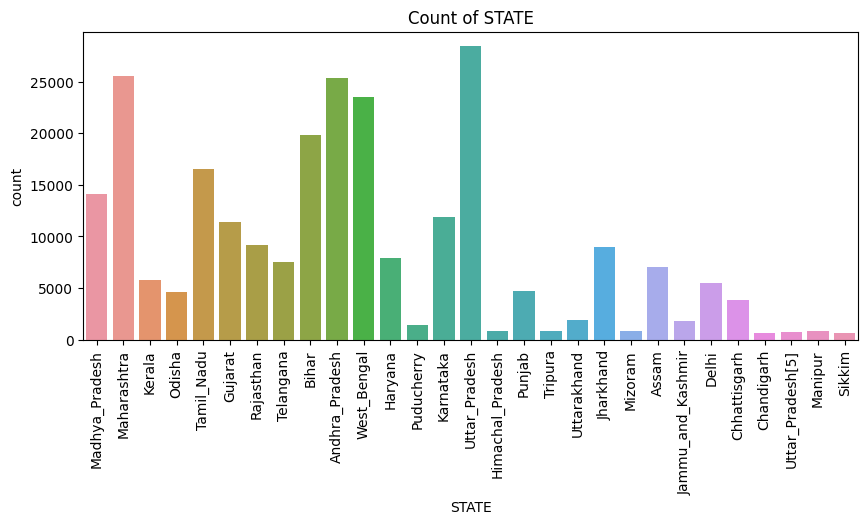

In [6]:
# Count of categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'Count of {col}')
    plt.show()

## 4. Distribution of Numerical Features:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


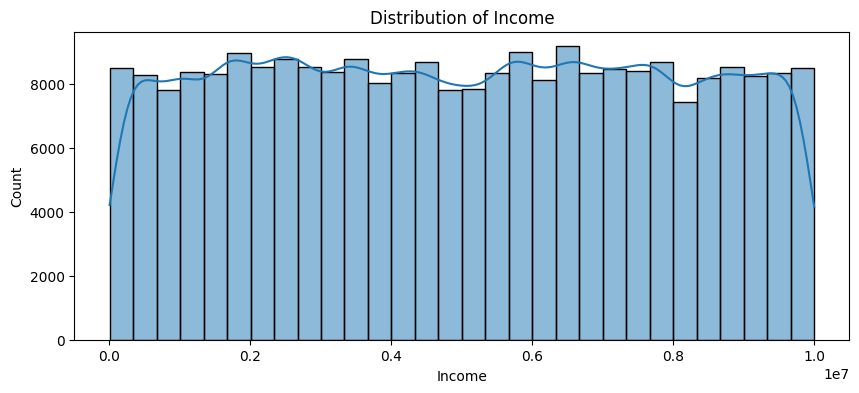

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


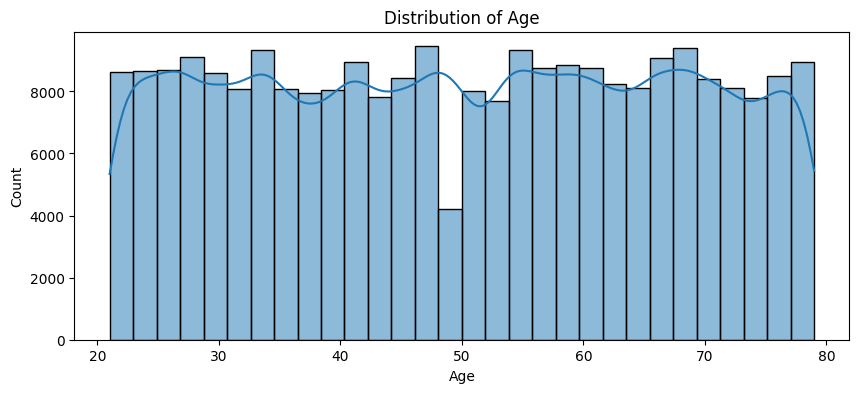

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


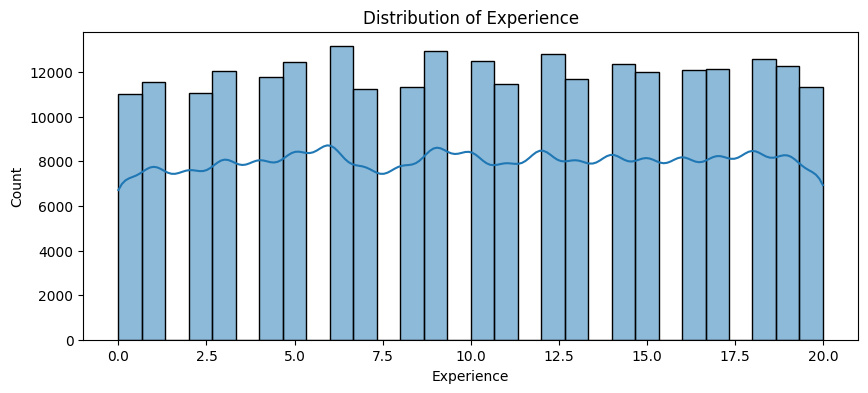

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


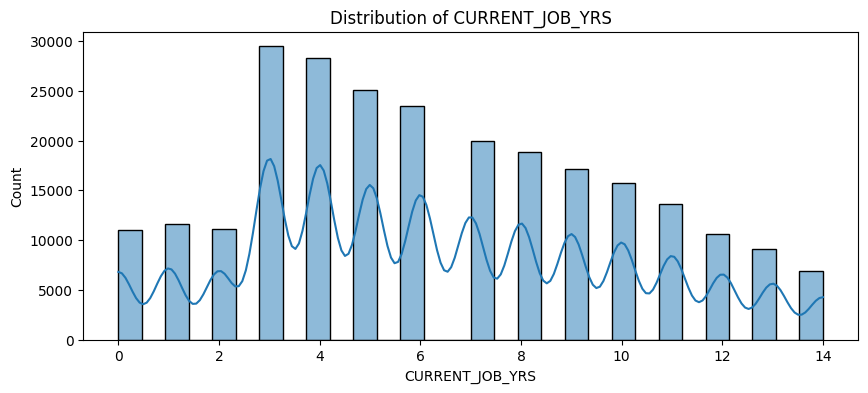

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


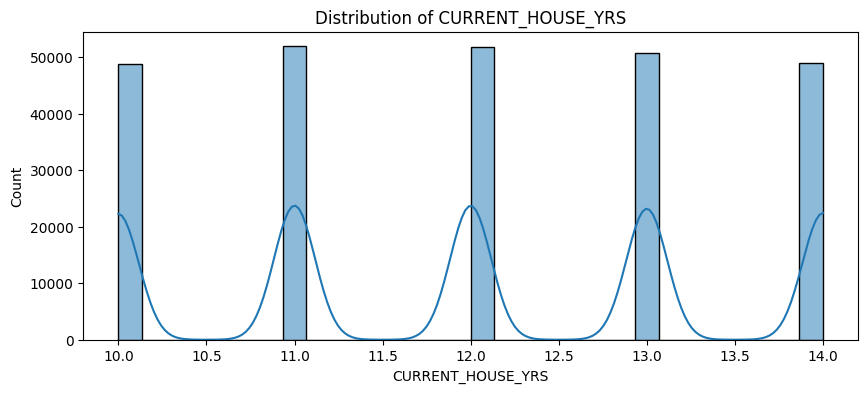

In [7]:
# Distribution of numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## 6. Relationship Between Features and Target:

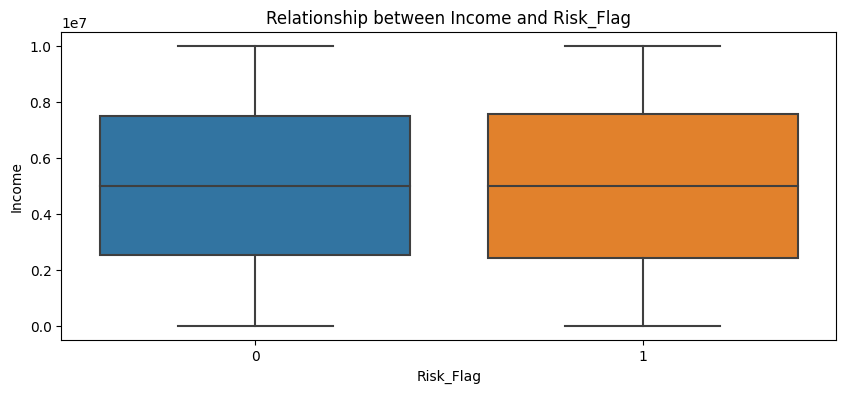

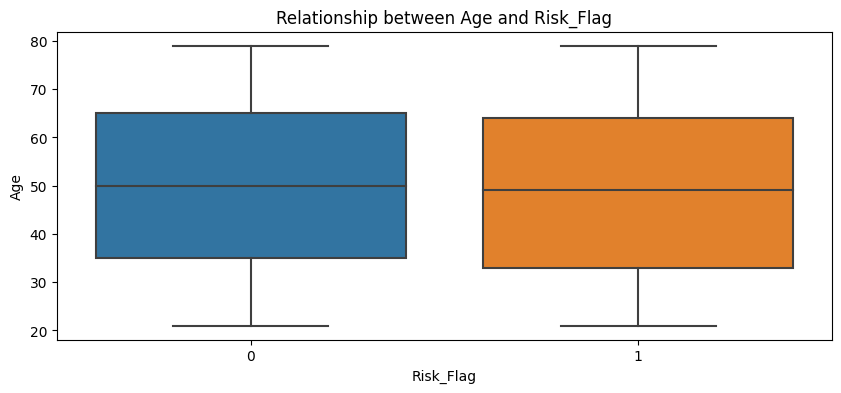

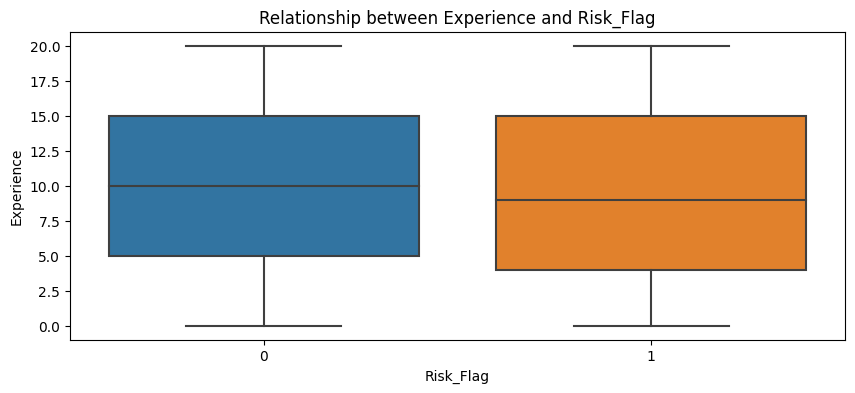

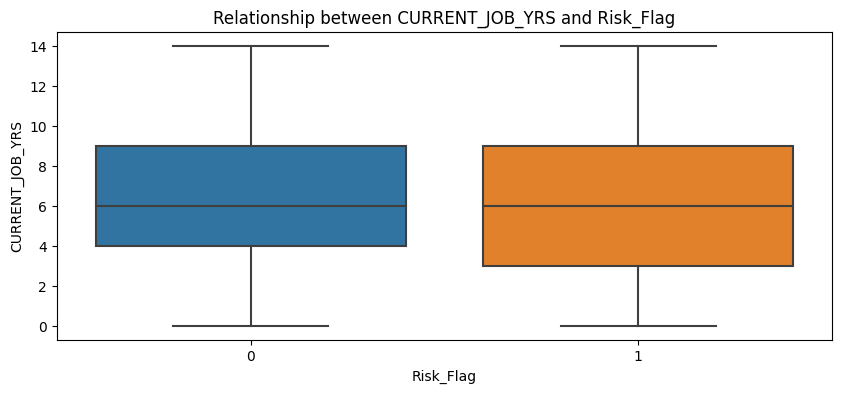

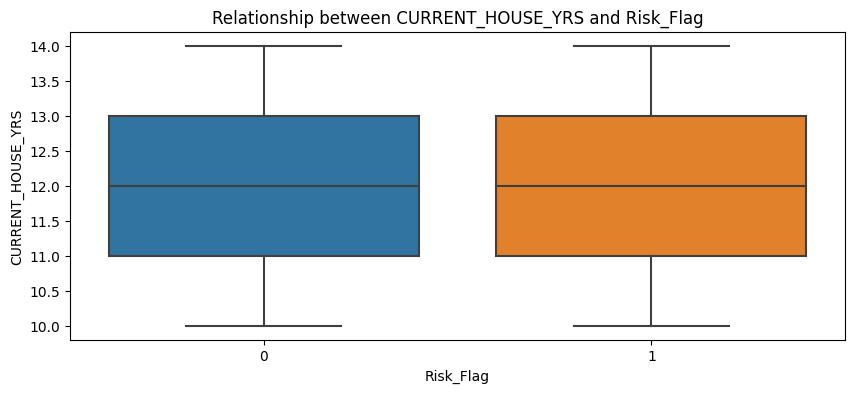

In [8]:
# Relationship between features and target
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Risk_Flag', y=col, data=df)
    plt.title(f'Relationship between {col} and Risk_Flag')
    plt.show()

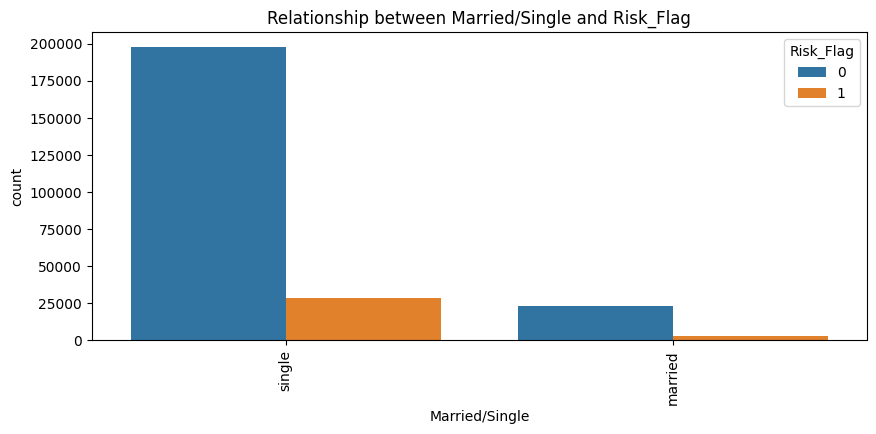

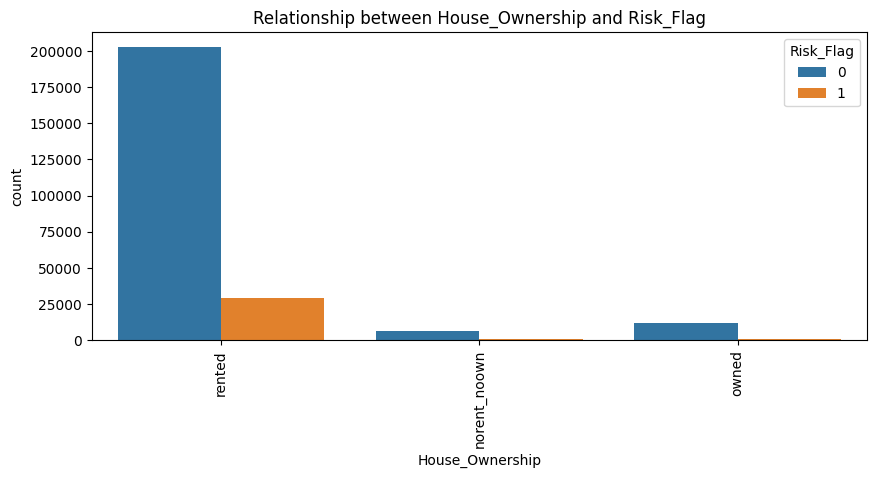

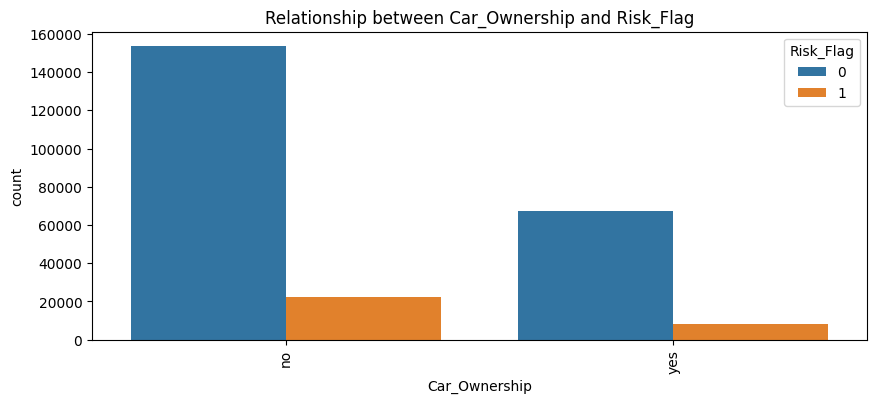

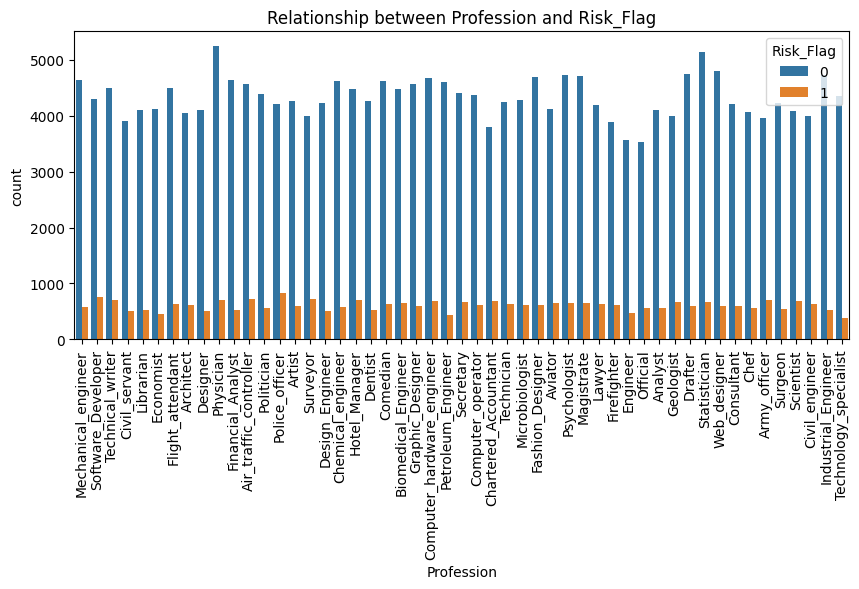

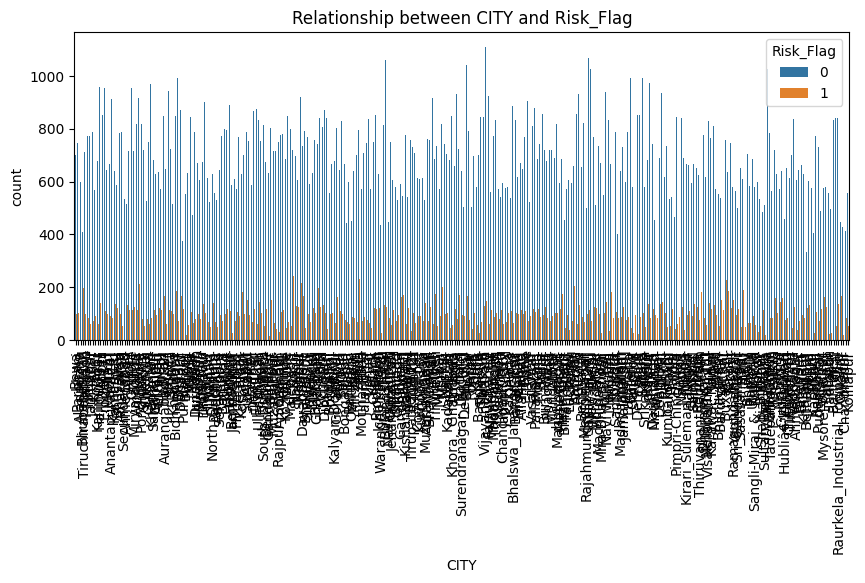

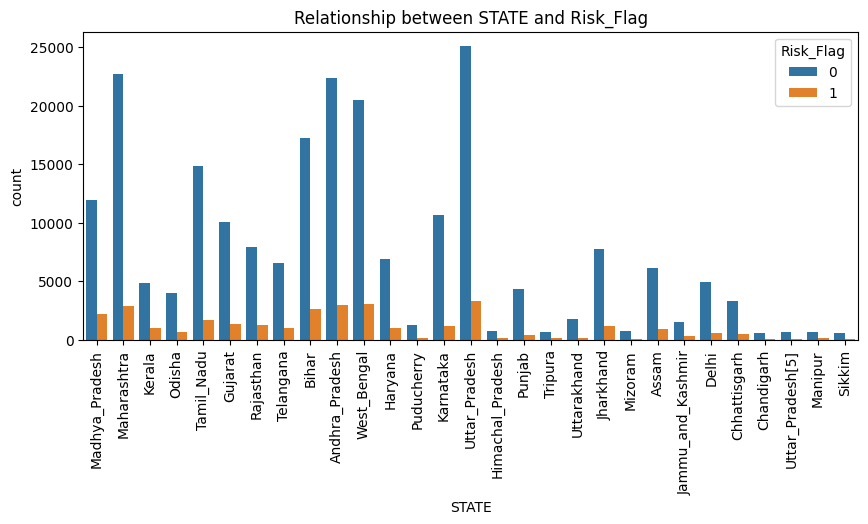

In [9]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Risk_Flag', data=df)
    plt.xticks(rotation=90)
    plt.title(f'Relationship between {col} and Risk_Flag')
    plt.show()

# Step 2: Feature Engineering
## 5.Encode Categorical Features and Scale Numerical Features:

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_cols])
X = np.hstack((scaled_features, encoded_features))
y = df['Risk_Flag']


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# Check the shapes of X and y before conversion
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (252000, 409)
Shape of y: (252000,)


# Step 3: Model Building
## 6. Split the Data:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 7. Train a Random Forest Model:

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 4: Model Evaluation
## 8. Make Predictions:

In [14]:
y_pred = model.predict(X_test)


## 9. Evaluate the Model:

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

print("Accuracy of Random Forest is is :", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy of Random Forest is is : 0.8985714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



## 10. Confusion Matrix:

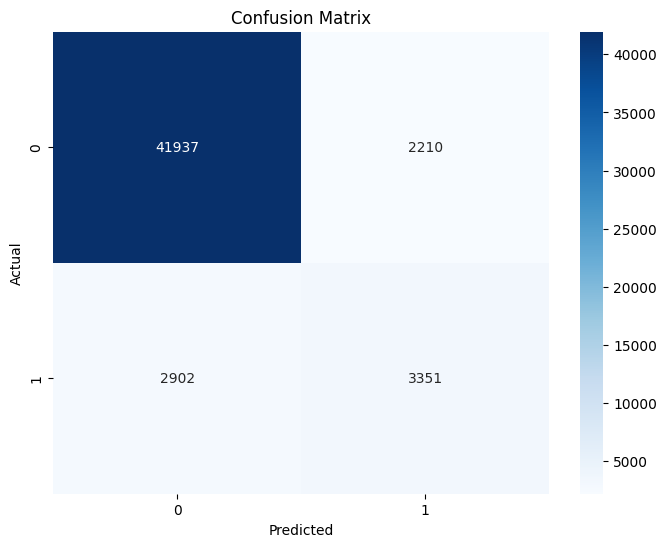

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 11. ROC Curve:

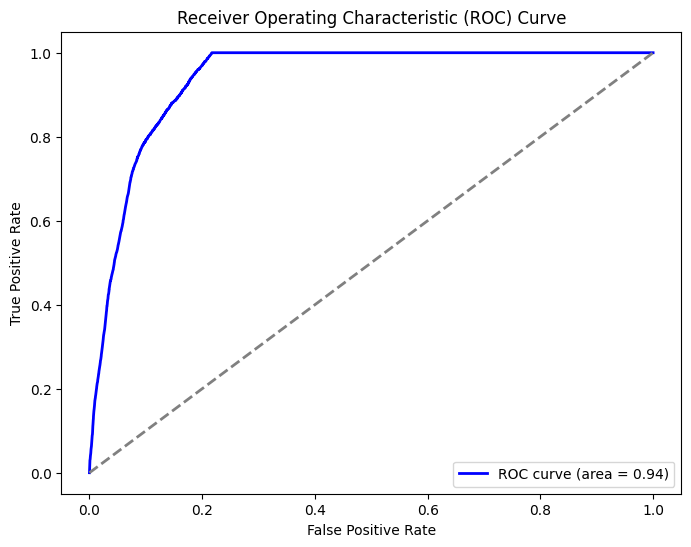

In [17]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## **End**